![Cluster](https://www.researchgate.net/publication/321788723/figure/fig1/AS:571405940473856@1513245200197/Figura-2-Comunidades-de-pratica-e-os-cenarios-de-estagio-e-suas-relacoes-Fonte-primeira.png)

# Projeto - Modelo de Clusters em Python

Material complementar: [A Beginner’s Guide to Hierarchical Clustering and how to Perform it in Python](https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/)

A análise de cluster é uma técnica estatística para agrupar indivíduos (pessoas, objetos, empresas, etc) em grupos homogênios, que sejam muito parecidos quando há a intenção de se verificar a existencia de **comportamentos semelhantes entre as observações** em relação a determinadas variáveis, é o objetivo de se criar grupos, ou **_clusters_**.  

As técnicas de análise de agrupamentos são consideradas **exploratórias**, ou de **independência** uma vez que suas caracteristicas não apresentam caráter preditivo.  

O pesquisador pode optar por elaborar uma análise de agrupamento quando tiver o objetivo de **ordenar e alocar as observaçoes em grupos** e, a partir de então, estudar a quantidade interessante de _clusters_ formados, ou pode a _priori_, definir a quantidade de grupos que deseja formar embasado em determinado critério, e verificar como se comportam. Independente da natureza do objetivo, a análise continuará sendo exploratória.

## Etapas do Projeto

 - Vizualizar as variáveis;
 - Verificar Outliers;
 - Tratamento das variáveis;
 - Executar o modelo de cluster.

In [4]:
# Leitura das Bibliotecas 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Leitura dos Data Frame
un = pd.read_excel('DADOS_PAX_CLUSTER.xlsx', 
                   sheet_name='UN_National Stats')

# Vizualização do Data Frame
un.head()

,country,region,group,fertility,ppgdp,lifeExpF,pctUrban,infantMortality
0,Albania,Europe,other,1.525,3677.2,80.40,53,16.561
1,Algeria,Africa,africa,2.142,4473.0,75.00,67,21.458
2,Angola,Africa,africa,5.135,4321.9,53.17,59,96.191
3,Argentina,Latin Amer,other,2.172,9162.1,79.89,93,12.337
4,Armenia,Asia,other,1.735,3030.7,77.33,64,24.272


In [6]:
un.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          189 non-null    object 
 1   region           189 non-null    object 
 2   group            189 non-null    object 
 3   fertility        189 non-null    float64
 4   ppgdp            189 non-null    float64
 5   lifeExpF         189 non-null    float64
 6   pctUrban         189 non-null    int64  
 7   infantMortality  189 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 11.9+ KB


## Exploratory Data Analysis (EDA)

### Análise da variável 'Fertility'

Text(0.5, 1.0, 'fertility')

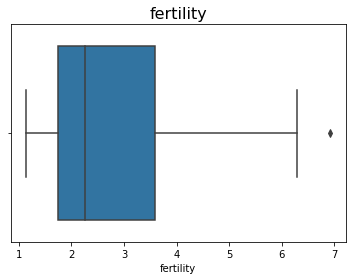

In [7]:
sns.boxplot(x = un['fertility'])
plt.title('fertility', size = 16)

Text(0.5, 1.0, 'Histograma de fertility')

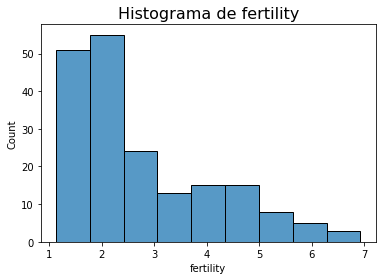

In [8]:
sns.histplot(x = un['fertility']).set_title('Histograma de fertility', size = 16)

### Análise da variável 'ppgdp'

Text(0.5, 1.0, 'Variável un$ppgdp')

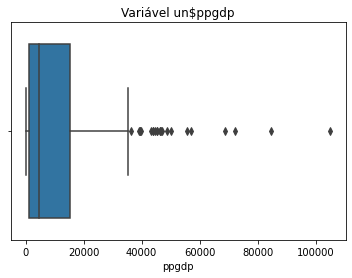

In [9]:
sns.boxplot(x = un['ppgdp']).set_title('Variável un$ppgdp')

Text(0.5, 1.0, 'Variável un$ppgdp')

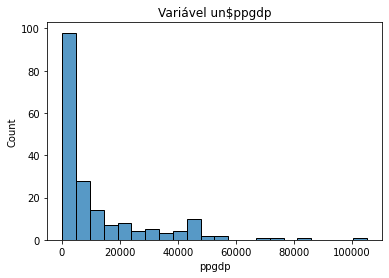

In [10]:
# Vizualização com outlier no final do gráfico
sns.histplot(x = un['ppgdp']).set_title('Variável un$ppgdp')

Text(0.5, 1.0, 'Varialvel log_ppgdp')

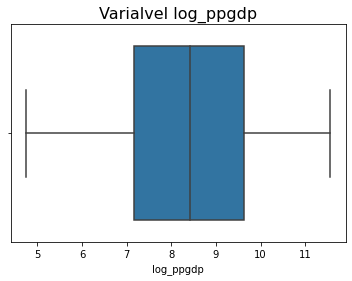

In [11]:
# Modificando uma variável para log
un['log_ppgdp'] = np.log(un['ppgdp']).astype('float64')

# Boxplot da variavel log
sns.boxplot(x = un['log_ppgdp']).set_title('Varialvel log_ppgdp', size = 16)

<AxesSubplot:xlabel='log_ppgdp', ylabel='Count'>

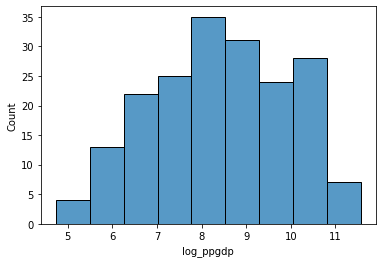

In [12]:
# Grafico do log de ppgdp. Camuflando os outliers
sns.histplot(x = un['log_ppgdp'])

In [13]:
# Verificando o impacto de transformação de uma variável em log
# Ocultando outlier, isso pode pejudicar na hora de montar os cluster.
round(un[['log_ppgdp', 'ppgdp']].describe(),2)

,log_ppgdp,ppgdp
count,189.00,189.00
mean,8.42,12422.92
std,1.55,17554.54
min,4.74,114.80
25%,7.16,1282.60
50%,8.41,4495.80
75%,9.63,15205.10
max,11.56,105095.40


Text(0.5, 1.0, 'Varialvel sqtr_ppgdp')

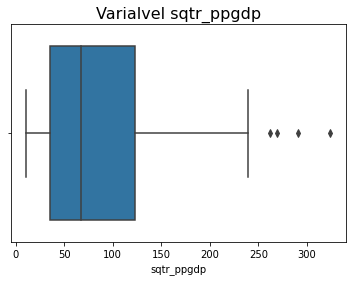

In [14]:
# Tirando a raiz quadrada do número
un['sqtr_ppgdp'] = pow(un[['ppgdp']], .5)

# Boxplot da variavel log
sns.boxplot(x = un['sqtr_ppgdp']).set_title('Varialvel sqtr_ppgdp', size = 16)

<AxesSubplot:xlabel='sqtr_ppgdp', ylabel='Count'>

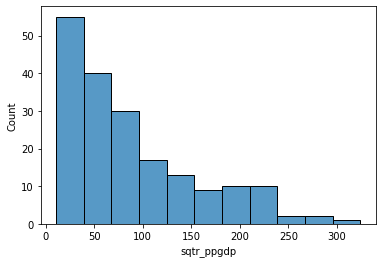

In [15]:
# Tirando a raiz da variável a vizualização melhora muito a respeito dos outliers
sns.histplot(x = un['sqtr_ppgdp'])

In [16]:
# Verificando o impacto de transformação de uma variável em log
# Ocultando outlier, isso pode pejudicar na hora de montar os cluster.
round(un[['log_ppgdp', 'ppgdp', 'sqtr_ppgdp']].describe(),2)

,log_ppgdp,ppgdp,sqtr_ppgdp
count,189.00,189.00,189.00
mean,8.42,12422.92,89.38
std,1.55,17554.54,66.77
min,4.74,114.80,10.71
25%,7.16,1282.60,35.81
50%,8.41,4495.80,67.05
75%,9.63,15205.10,123.31
max,11.56,105095.40,324.18


In [17]:
# Verificando a coposição das variáveis categóricas no Data Frame
un.groupby(by = un['region'])['country'].count()

region
Africa           51
Asia             49
Caribbean        13
Europe           39
Latin Amer       20
North America     2
Oceania          15
Name: country, dtype: int64

In [18]:
# Verificando a coposição das variáveis categóricas no Data Frame
un.groupby(by = un['group'])['country'].count()

group
africa     51
oecd       31
other     107
Name: country, dtype: int64

In [19]:
# Selecionando apenas as variáveis numéricas
un.select_dtypes(include='number').head()

,fertility,ppgdp,lifeExpF,pctUrban,infantMortality,log_ppgdp,sqtr_ppgdp
0,1.525,3677.2,80.40,53,16.561,8.209907,60.639921
1,2.142,4473.0,75.00,67,21.458,8.405815,66.880490
2,5.135,4321.9,53.17,59,96.191,8.371450,65.741159
3,2.172,9162.1,79.89,93,12.337,9.122831,95.718859
4,1.735,3030.7,77.33,64,24.272,8.016549,55.051794


In [20]:
# Selecionando apenas as variáveis numéricas
un_numerico = un.select_dtypes(include='number')

# Excluindo a variável ppgdp e log_ppgdp, pois iremos utilizar apenas a sqtr_ppgdp
un_numerico = un_numerico.drop(['ppgdp', 'log_ppgdp'], axis = 1)

# Index
un_numerico.index.values

# Vizualizar o resultado
un_numerico.head()

,fertility,lifeExpF,pctUrban,infantMortality,sqtr_ppgdp
0,1.525,80.40,53,16.561,60.639921
1,2.142,75.00,67,21.458,66.880490
2,5.135,53.17,59,96.191,65.741159
3,2.172,79.89,93,12.337,95.718859
4,1.735,77.33,64,24.272,55.051794


## Montando a matriz de correlação das variáveis numéricas

O objetivo dessa análise é encontrar variáveis altamente correlacionadas a fim de que possa prejudicar na preparação dos cluster.  

**Correlação (0,9 a 1,0):** positiva ou negativa é considerada muito forte;  
**Correlação (0,7 a 0,9):** positiva ou negativa é considerada correlação forte;  
**Correlação (0,5 a 0,7):** positiva ou negativa é considerada correlação moderada;  
**Correlação (0,3 a 0,4):** positiva ou negativa é considerada correlação fraca;  
**Correlação (0,0 a 0,3):** positiva ou negativa não possui correlação;

In [21]:
# Montando a correlação das variáveis do dataframe
# As Variáveis lifeExpF e infantMortality estão altamente correlacionadas
# Decidimos por retirar a 'infantMortality'
round( un_numerico.corr(), 2)

,fertility,lifeExpF,pctUrban,infantMortality,sqtr_ppgdp
fertility,1.00,-0.82,-0.53,0.85,-0.58
lifeExpF,-0.82,1.00,0.59,-0.94,0.68
pctUrban,-0.53,0.59,1.00,-0.59,0.69
infantMortality,0.85,-0.94,-0.59,1.00,-0.66
sqtr_ppgdp,-0.58,0.68,0.69,-0.66,1.00


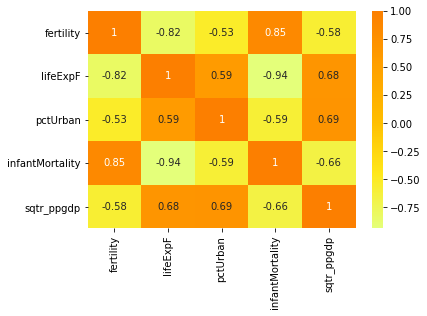

In [22]:
# Gráfico de correlação
sns.heatmap(un_numerico.corr(), cmap="Wistia", annot=True)
plt.show()

In [23]:
# Outra forma de excluir colunas em um Data Frame
un_numerico = un_numerico.drop(columns=['infantMortality'])

# Gerando novamente a correlação 
round( un_numerico.corr(), 2)

,fertility,lifeExpF,pctUrban,sqtr_ppgdp
fertility,1.00,-0.82,-0.53,-0.58
lifeExpF,-0.82,1.00,0.59,0.68
pctUrban,-0.53,0.59,1.00,0.69
sqtr_ppgdp,-0.58,0.68,0.69,1.00


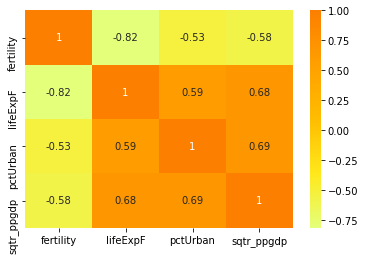

In [24]:
# Gráfico de correlação
sns.heatmap(un_numerico.corr(), cmap="Wistia", annot=True)
plt.show()

## Calculando a distancia Euclidiana dos dados - Padronização dos Dados

A padronização foi realizada pela Score Z (Normalização segundo a Amplitude)

$$
Score \; Z = \dfrac{Valor - Média}{Desvio}
$$

Fonte: [Normalização/Padronização](https://rpubs.com/victorpasson/normalizacao)

In [25]:
# Calcular a média dos desvios
print(un_numerico.mean(),
      un_numerico.std() 
     )

# Calcular o desvio
# Realizar o calculo

fertility      2.753241
lifeExpF      72.285185
pctUrban      57.195767
sqtr_ppgdp    89.378464
dtype: float64 fertility      1.329027
lifeExpF      10.040272
pctUrban      22.993033
sqtr_ppgdp    66.768214
dtype: float64


In [26]:
# Gerando a padronização das variáveis
un_num_padr = ((
    un_numerico[['fertility', 'lifeExpF', 'pctUrban', 'sqtr_ppgdp']] - 
    un_numerico[['fertility', 'lifeExpF', 'pctUrban', 'sqtr_ppgdp']].mean() 
                ) / 
    un_numerico.std()
               )

un_num_padr.head()

,fertility,lifeExpF,pctUrban,sqtr_ppgdp
0,-0.924165,0.808227,-0.182480,-0.430423
1,-0.459916,0.270393,0.426400,-0.336956
2,1.792108,-1.903851,0.078469,-0.354020
3,-0.437343,0.757431,1.557177,0.094961
4,-0.766155,0.502458,0.295926,-0.514117


In [27]:
# REsultado a Padronização 
round( un_num_padr.describe(), 2)

,fertility,lifeExpF,pctUrban,sqtr_ppgdp
count,189.00,189.00,189.00,189.00
mean,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.22,-2.41,-2.01,-1.18
25%,-0.77,-0.67,-0.79,-0.80
50%,-0.37,0.33,0.08,-0.33
75%,0.63,0.72,0.73,0.51
max,3.14,1.48,1.86,3.52


Para calcular a distancia euclidiana utilizaremos a fórmula abaixo:

$$
d(x,y) = \sqrt{\sum^{n}_{i = 1} (y_i - x_i)^2}
$$

In [28]:
from scipy.spatial import distance_matrix

# Gerando a matriz de distancia com o Método Euclidiano
un_num_dist = pd.DataFrame(distance_matrix(un_num_padr.values, un_num_padr.values),
                           index=un_num_padr.index, 
                           columns=un_num_padr.index)

# Data Frame da matriz de distância 
un_num_dist.head(6)

,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,188
0,0.000000,0.940353,3.848043,1.882023,0.595263,1.410012,3.136464,2.390739,0.847980,1.922967,...,2.296515,2.698070,1.926322,1.299913,2.156789,2.089833,1.088865,3.025719,4.769080,3.113496
1,0.940353,0.000000,3.149650,1.304962,0.442771,1.597126,2.904149,2.417191,0.677139,1.509449,...,2.083724,2.419210,1.416386,1.453086,2.167539,1.426042,1.683519,2.732353,4.243988,2.711126
2,3.848043,3.149650,0.000000,3.800137,3.522492,3.833557,4.876178,4.718949,3.054235,3.914227,...,4.343326,4.391624,3.939783,3.053295,2.703117,3.624190,3.746154,1.912437,1.440715,1.863986
3,1.882023,1.304962,3.800137,0.000000,1.461116,2.208986,2.203075,2.181936,1.913238,0.933290,...,1.566858,1.856292,0.238416,2.745287,3.267715,0.411622,2.876631,3.688245,5.045183,3.806760
4,0.595263,0.442771,3.522492,1.461116,0.000000,1.619562,3.045605,2.461895,0.769786,1.675629,...,2.207324,2.588155,1.554109,1.414489,2.273680,1.669236,1.468283,2.956126,4.556037,2.911388
5,1.410012,1.597126,3.833557,2.208986,1.619562,0.000000,2.352107,1.439319,1.280833,1.620455,...,1.626859,1.898921,2.134821,1.910867,2.356377,2.178551,1.883525,3.218002,4.795282,3.337304


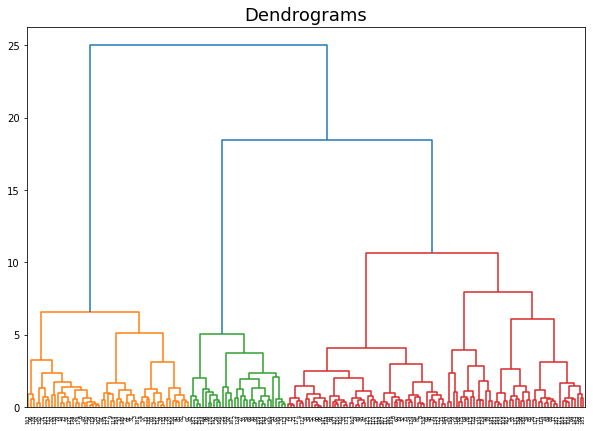

In [29]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms", size = 18)  
dend = shc.dendrogram(shc.linkage(un_num_padr, method='ward'))

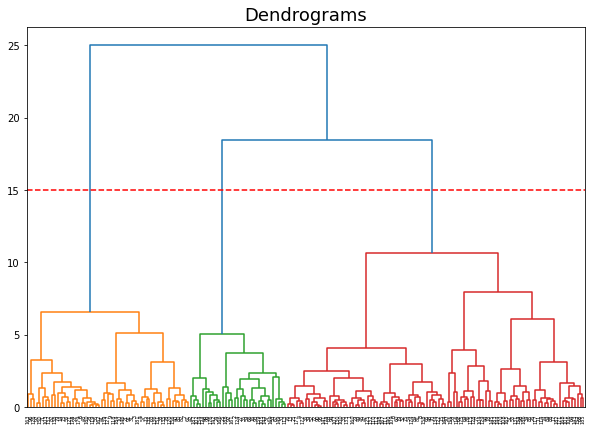

In [30]:
# Opção por tres clusters
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms", size = 18)  
dend = shc.dendrogram(shc.linkage(un_num_padr, method='ward'))
plt.axhline(y=15,  
            color='r', 
            linestyle='--')

In [31]:
from sklearn.cluster import AgglomerativeClustering

# criando os Clusters
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  

# Salvando os cluster na coluna hclust no Data Frame un
un['hclust'] = cluster.fit_predict(un_num_padr)

In [32]:
un.loc[(un['hclust'] == 0)]['country']

0         Albania
1         Algeria
4         Armenia
8      Azerbaijan
11     Bangladesh
          ...    
177       Ukraine
182    Uzbekistan
183       Vanuatu
185      Viet Nam
186         Yemen
Name: country, Length: 101, dtype: object

In [33]:
un.loc[(un['hclust'] == 1)]['country']

3                 Argentina
5                     Aruba
6                 Australia
7                   Austria
9                   Bahamas
10                  Bahrain
12                 Barbados
14                  Belgium
21                   Brazil
22        Brunei Darussalam
28                   Canada
31                    Chile
38                  Croatia
40                   Cyprus
41           Czech Republic
43                  Denmark
55                  Finland
56                   France
57         French Polynesia
61                  Germany
63                   Greece
71                Hong Kong
73                  Iceland
78                  Ireland
79                   Israel
80                    Italy
82                    Japan
87                   Kuwait
91                  Lebanon
96               Luxembourg
97                    Macao
103                   Malta
118           Neth Antilles
119             Netherlands
120           New Caledonia
121             New 

In [34]:
un.loc[(un['hclust'] == 2)]['country']

2                                Angola
16                                Benin
24                         Burkina Faso
25                              Burundi
27                             Cameroon
30             Central African Republic
35                                Congo
37                         Cote dIvoire
42     Democratic Republic of the Congo
46                          Timor Leste
50                    Equatorial Guinea
59                               Gambia
66                               Guinea
67                        Guinea-Bissau
92                              Lesotho
93                              Liberia
99                               Malawi
102                                Mali
105                          Mauritania
113                          Mozambique
123                               Niger
124                             Nigeria
142                              Rwanda
147                             Senegal
149                        Sierra Leone


Text(0.5, 1.0, 'lifeExpF')

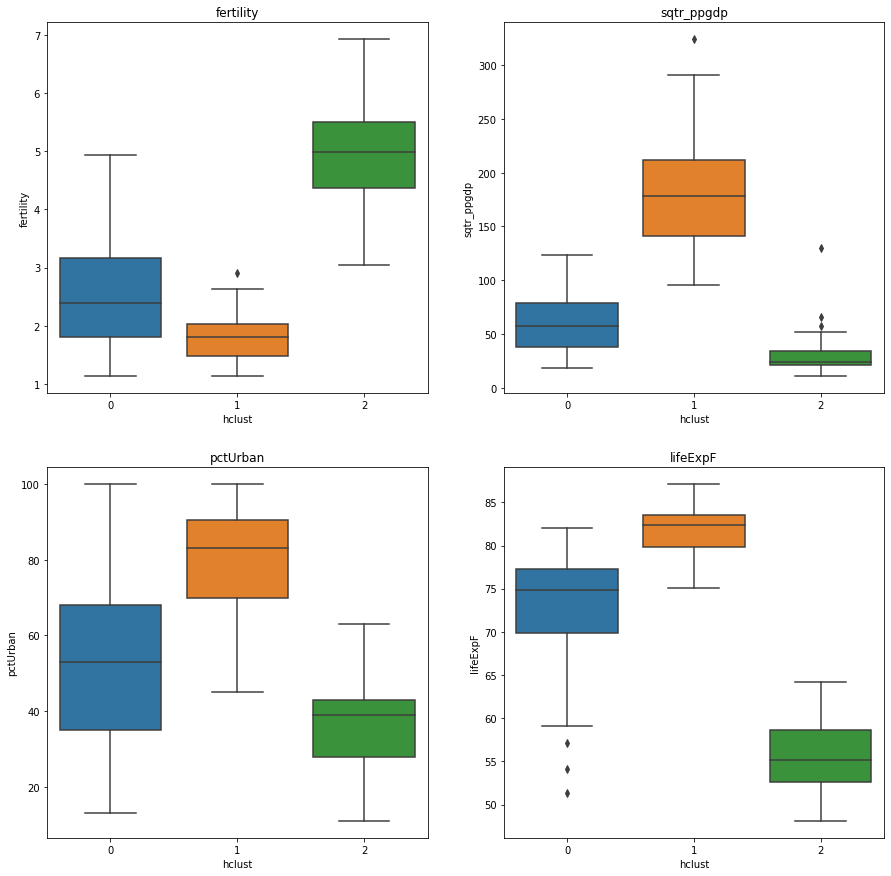

In [35]:
# Exploratory Date Analyses
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#definindo o tamanho das figuras
fig = plt.figure(figsize=(15, 15))

# Gráfico 1 - Barras de Count
fig.add_subplot(221)
sns.boxplot(y = un['fertility'], 
            x = un['hclust']).set_title('fertility')

# Gráfico 2 - Boxplot de Reason
fig.add_subplot(222)
sns.boxplot(y = un['sqtr_ppgdp'], 
            x = un['hclust']).set_title('sqtr_ppgdp')

# Gráfico 3 - Barras de Count
fig.add_subplot(223)
sns.boxplot(y = un['pctUrban'],
            x = un['hclust']).set_title('pctUrban')

# Gráfico 4 - Boxplot de Reason
fig.add_subplot(224)
sns.boxplot(y = un['lifeExpF'], 
            x = un['hclust']).set_title('lifeExpF')

# **FIM**

## Bibliotecas utilizadas:  

- [Pandas: https://pandas.pydata.org/docs/reference/io.html](https://pandas.pydata.org/docs/reference/io.html)
- [Seaborn: https://seaborn.pydata.org](https://seaborn.pydata.org)
- [Matplotlib: https://matplotlib.org](https://matplotlib.org)
- [Scipy: https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html)